# TM10007 Assignment template

In [1]:
# Run this to use from colab environment
#!pip install -q --upgrade git+https://github.com/jveenland/tm10007_ml.git

## Data loading and cleaning

Below are functions to load the dataset of your choice. After that, it is all up to you to create and evaluate a classification method. Beware, there may be missing values in these datasets. Good luck!

In [63]:
#Load packages

import pandas as pd
import numpy as np
import matplotlib.pyplot

#from sklearn.decomposition import PCA
#from sklearn import datasets as ds
from sklearn import metrics
from sklearn import model_selection
from sklearn.manifold import TSNE



# Classifiers 
# from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier



# Importing Data loading functions. Uncomment the one you want to use
from worcliver.load_data import load_data
from scipy.stats import ttest_ind, mannwhitneyu, shapiro
from statsmodels.stats.multitest import multipletests
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from scipy.stats import zscore
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score


#import scalers 
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler


In [3]:
# Loading the data
data = load_data()

# Presentation of the data:

In [28]:
# Description of the data
print(f'The number of samples: {len(data.index)}')
print(f'The number of features: {len(data.columns)}')

# Counting missing values
missing_values = data.isnull().sum()
total_missing = missing_values.sum()

print(f"Total missing values in the dataset: {total_missing}\n")
print(f"Missing values per feature:\n{missing_values[missing_values > 0]}\n")

# Counting categorical and numerical columns
categorical_columns = data.select_dtypes(include=['object']).columns
numerical_columns = data.select_dtypes(exclude=['object']).columns

print(f"Number of categorical columns: {len(categorical_columns)}")
print(f"Number of numerical columns: {len(numerical_columns)}\n")

# Count of each label (benign/malignant)
label_counts = data['label'].value_counts()

print("Label distribution:")
print(label_counts)

# Display basic info
print("Summary statistics:")
print(data.describe(), "\n")

print("First five rows of the dataset:")
print(data.head(), "\n")

print("Dataset info:")
print(data.info(), "\n")


The number of samples: 186
The number of features: 494
Total missing values in the dataset: 0

Missing values per feature:
Series([], dtype: int64)

Number of categorical columns: 1
Number of numerical columns: 493

Label distribution:
label
malignant    94
benign       92
Name: count, dtype: int64
Summary statistics:
       PREDICT_original_sf_compactness_avg_2.5D  \
count                                186.000000   
mean                                   0.808754   
std                                    0.070161   
min                                    0.549046   
25%                                    0.773570   
50%                                    0.824074   
75%                                    0.857698   
max                                    0.926346   

       PREDICT_original_sf_compactness_std_2.5D  \
count                                186.000000   
mean                                   0.071922   
std                                    0.047649   
min             

# ** Visualization of features

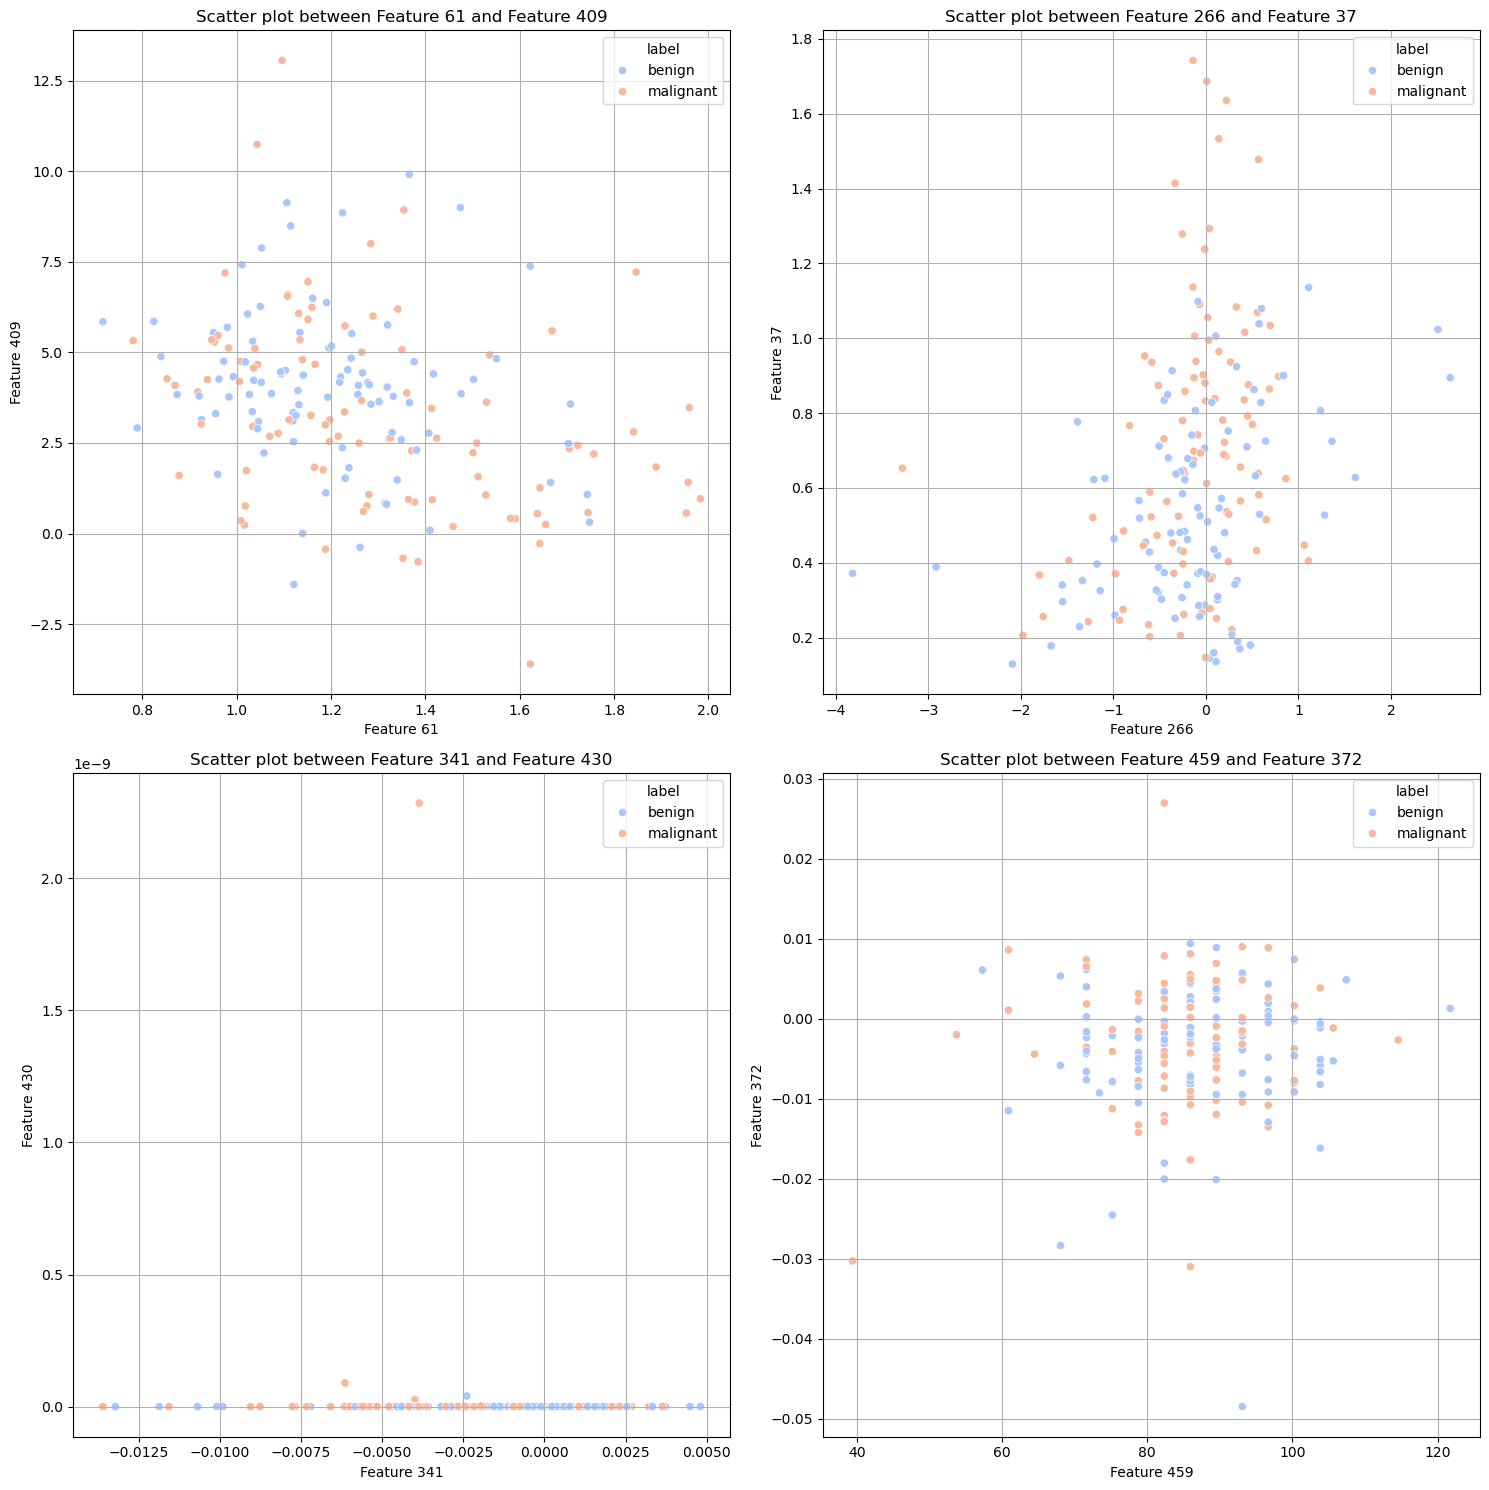

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# For loop with a 4 subplots in which 2 features are put against eachother to visualize the data
fig = plt.figure(figsize=(15, 15))

for i in range(4):
    random_columns = np.random.choice(data.columns[:-1], size=2, replace=False)
    
    # Use the index number of the feature for the title
    feature_num1 = list(data.columns).index(random_columns[0]) + 1
    feature_num2 = list(data.columns).index(random_columns[1]) + 1
    
    ax = fig.add_subplot(2, 2, i + 1)  # Manually creating subplots (2 rows, 2 columns)
    sns.scatterplot(x=data[random_columns[0]], y=data[random_columns[1]], hue=data['label'], palette='coolwarm', ax=ax)
    ax.set_title(f"Scatter plot between Feature {feature_num1} and Feature {feature_num2}")
    ax.set_xlabel(f"Feature {feature_num1}")
    ax.set_ylabel(f"Feature {feature_num2}")
    ax.grid(True)

plt.tight_layout()
plt.show()



# Pre-processing 

In [ ]:
## As pre-processing, the labels are changed to 0 and 1 and the outliners are searched 

# Changing labels malignant and benign to 0 and 1
#changing string (malignant or benign) to 0 or 1
num_data = data.copy()

# Transform labels: benign -> 1, malignant -> 0
num_data['label'] = num_data['label'].map({'benign': 1, 'malignant': 0})


# Checking for outliers
# Checking skewness for each feature in the training set in order to choose the scaler
skewness = x_train.skew()

# Printing the skewness for each feature
print("Skewness of features:")
print(skewness)

# Identifying features that have skewness greater than 1 or less than -1 (highly skewed)
skewed_features = skewness[abs(skewness) > 1].index
print("\nHighly skewed features (Skewness > 1 or < -1):")
print(skewed_features)

# Checking for outliers using Z-scores (Threshold: Z > 3 or Z < -3)
z_scores = np.abs(zscore(x_train))

# Identifying features with Z-scores above the threshold (outliers)
outliers = (z_scores > 3)

# Getting the feature names where outliers exist
outlier_features = x_train.columns[(outliers.any(axis=0))].tolist()
print("\nFeatures with outliers (Z-score > 3):")
print(outlier_features)

# Optionally, calculate the IQR for outlier detection
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers based on IQR
outliers_iqr = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR)))

# Getting feature names with IQR outliers
outlier_features_iqr = x_train.columns[(outliers_iqr.any(axis=0))].tolist()
print("\nFeatures with outliers based on IQR:")
print(outlier_features_iqr)


# Splitting data in train and test test


In [ ]:
# Splitting data in test and train set 
y = num_data['label']
x = num_data[:]

# x is features, y  = maligne / benign
x_train, x_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)

# Print the shape of the data sets  
print(f'The shape of the train data: {x_train.shape}')
print(f'The shape of the test data: {x_test.shape}')


The shape of the train data: (148, 494)
The shape of the test data: (38, 494)


# Selecting significant features

In [ ]:
## Select significant features
# Add the label column back to x_train
x_train_with_label = x_train.copy()
x_train_with_label['label'] = y_train

# Separate benign and malignant samples in training data
benign = x_train_with_label[x_train_with_label['label'] == 1]
malignant = x_train_with_label[x_train_with_label['label'] == 0]

#x_train_with_label.to_csv('x_train_label.csv', index=False) 
# Perform statistical analysis
features = []
sig_features = []

# Loop through all features except 'label'
for feature in x_train_with_label.columns:
    if feature == 'label':  # Skip the label column
        continue
        
    # Data for current feature
    benign_values = benign[feature].dropna()
    malignant_values = malignant[feature].dropna()

    # Ignore constant values within group for Shapiro-Wilk test
    if benign_values.nunique() == 1 or malignant_values.nunique() == 1:
        continue
    
    # Normality test (Shapiro-Wilk test, p < 0.05 means not normally distributed)
    _, p_benign = shapiro(benign_values)
    _, p_malignant = shapiro(malignant_values)
    
    # Determine which test to use
    if p_benign > 0.05 and p_malignant > 0.05:  # Both distributions are normal
        test_type = "t-test"
        stat, p_value = ttest_ind(benign_values, malignant_values, equal_var=False)  # Welch's t-test
    else:
        test_type = "Mann-Whitney U-test"
        stat, p_value = mannwhitneyu(benign_values, malignant_values, alternative='two-sided')
    
    # Save results
    feature_entry = {
        "Feature": feature,
        "Test": test_type,
        "p_value": p_value
    }
    features.append(feature_entry)
    
    # Check for significance (p <= 0.05)
    if p_value <= 0.05:
        sig_entry = feature_entry.copy()
        sig_features.append(sig_entry)

# Convert to DataFrames
features_df = pd.DataFrame(features)
sig_features_df = pd.DataFrame(sig_features)

# Multiple testing correction (False Discovery Rate - Benjamini-Hochberg)
if not features_df.empty:
    reject, p_corrected, alphacSidak, alphacBonf = multipletests(features_df["p_value"], method='fdr_bh')
    features_df["p_value_corrected"] = p_corrected

# Sort significant features by p-value only if there are significant features
if not sig_features_df.empty:
    sig_features_df = sig_features_df.sort_values(by="p_value")

# Print and save results
# print("\nTotal Significant Features:")
# print(sig_features_df)
print(f"\nNumber of significant features: {len(sig_features_df)}")

# Get the list of significant feature names
sig_feature_names = sig_features_df['Feature'].tolist() if not sig_features_df.empty else []

# Select only significant features for training data if there are any
if sig_feature_names:
    x_train_sig = x_train[sig_feature_names].copy()
else:
    print("No significant features found. Cannot create x_train_sig.")



Number of significant features: 153


# t-SNE plot


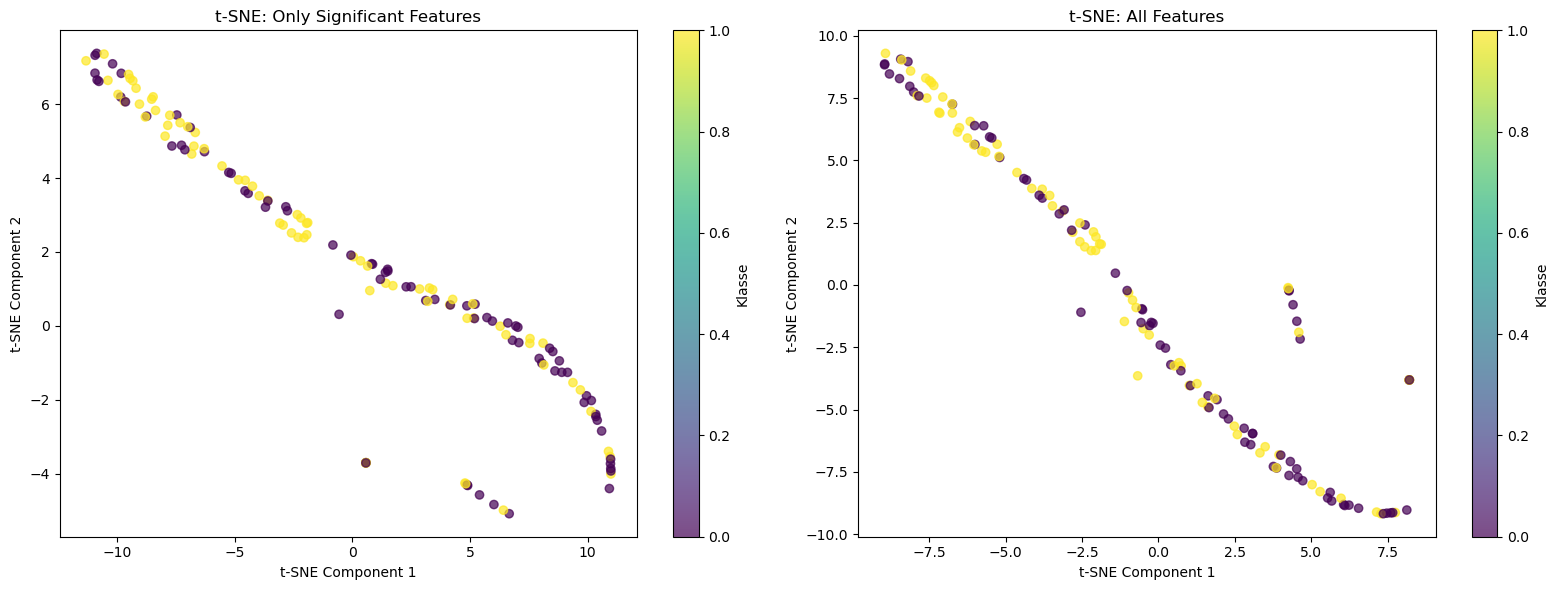

In [29]:
## t-SNE plot to plot the data 

# t-SNE  on trainingsdata for significant features
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne_sig = tsne.fit_transform(x_train_sig)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))

# Plot of the siginificant features
scatter1 = ax[0].scatter(x_train_tsne_sig[:, 0], x_train_tsne_sig[:, 1], c=y_train, cmap='viridis', alpha=0.7)
ax[0].set_title("t-SNE: Only Significant Features")
ax[0].set_xlabel("t-SNE Component 1")
ax[0].set_ylabel("t-SNE Component 2")
fig.colorbar(scatter1, ax=ax[0], label='Klasse')

# t-SNE  on trainingsdata for all features
tsne = TSNE(n_components=2, random_state=42)
x_train_tsne = tsne.fit_transform(x_train)

# Plot of all features 
scatter2 = ax[1].scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=y_train, cmap='viridis', alpha=0.7)
ax[1].set_title("t-SNE: All Features")
ax[1].set_xlabel("t-SNE Component 1")
ax[1].set_ylabel("t-SNE Component 2")
fig.colorbar(scatter2, ax=ax[1], label='Klasse')

plt.tight_layout()
plt.show()

# 1. Linear classifier

In [ ]:
# Test how many feautures are normal distributed and covariances equal (p > 0.05)

#From features_df, sum how many t test used, i.e. are normal distributed from all features
normal_distributed = features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
print(f' The ammount of normal distributed features is: {normal_distributed}')

#the ammount of normal distibuted from significant features 
normal_distributed_sig = sig_features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
normal_distributed_non_sig = normal_distributed - normal_distributed_sig
print(f' The ammount of normal distributed features (p>0.05) {normal_distributed_non_sig}')

#Percentage of usable featrues for lineair classifier
print(f' Percentages of usable features for lineair classifier: {normal_distributed_non_sig/(len(data.columns))*100}')


#hier wordt de lineaire classif gemaakt, bepalen of we dat willen met 52
#lda = LinearDiscriminantAnalysis()
#lda = lda.fit(x_train, y_train)
#y_pred_lda = lda.predict(x_test)


 The ammount of normal distributed features is: 60
 The ammount of normal distributed features (p>0.05) 33
 Percentages of usable features for lineair classifier: 6.680161943319838


# 2. Quadratic classifier

In [30]:
# Quadratic classifier
# Test how many feautures are normal distributed and covariances not equal (p < 0.05)

#From features_df, sum how many t test used, i.e. are normal distributed from all features
normal_distributed = features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
print(f' The ammount of normal distributed features is: {normal_distributed}')

#the ammount of normal distibuted from non significant features 
normal_distributed_sig = sig_features_df.loc[features_df['Test'] == 't-test', 'Test'].count() 
print(f' The ammount of normal distributed features (p < 0.05) is: {normal_distributed_sig}')

#Percentage of usable featrues for quadratic classifier
print(f' Percentages of usable features for lineair classifier: {normal_distributed_sig/(len(data.columns))*100}')

# quadratic uitvoeren, later wss weg
#q_clas = QuadraticDiscriminantAnalysis()
#q_clas = q_clas.fit(x_train, y_train)
#q_clas_pred = q_clas.predict(x_test)

 The ammount of normal distributed features is: 60
 The ammount of normal distributed features (p < 0.05) is: 27
 Percentages of usable features for lineair classifier: 5.465587044534413


# 3. Hard support vector machine

In [ ]:
# Support vector machine ('hard)

svm_hard_pipeline = Pipeline([
    ('scaler', RobustScaler()), #robust scaler because of outliners 
    ('svm', LinearSVC(C=100, max_iter=100000)) #choose c=100 as a 'hard svm classifier'
])

validation_svm_linear = cross_val_score(svm_hard_pipeline, x_train, y_train, cv=4)

#Warning: failed to converge, not usuable 

c:\Users\manon\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\manon\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\manon\miniconda3\Lib\site-packages\sklearn\svm\_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


# 4. Soft margin support vector machine

In [61]:
## For the sorft margin SVM a search is done for the best hyperparameters

# Create a pipeline: first scaling, then the SVM classifier
svm_soft_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', SVC())
])

param_distributions = {
    'classifier__C': np.arange(0.001, 1.0, 0.1).tolist(),   
    'classifier__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'classifier__gamma': ['scale', 'auto'],                 # Relevant for rbf, poly, and sigmoid kernels
    'classifier__degree': [2, 3, 4, 5],                     # Only relevant when kernel='poly'
    'classifier__coef0': np.linspace(0, 1, 5).tolist()        # Only relevant for poly and sigmoid kernels
}

# loop over different values for hyperparameters
svm_search = RandomizedSearchCV(
    estimator=svm_soft_pipeline,
    param_distributions=param_distributions,
    n_iter=30,       # How many combinations of hyperparameters 
    cv=4,            # 4-fold cross-validation
    scoring='roc_auc',
    random_state=42,
    verbose=1,
    refit=True,
    n_jobs=-1
)

# Execute the Randomized Search on the training data (using only significant features)
svm_search.fit(x_train_sig, y_train)

# Print results
print("Best CV Score:", svm_search.best_score_)
print("Best Estimator:", svm_search.best_estimator_)
print("Best Parameters:", svm_search.best_params_)


#Results in a dataframe 
results_df = pd.DataFrame(svm_search.cv_results_)

Fitting 4 folds for each of 30 candidates, totalling 120 fits
Best CV Score: 0.8340643274853801
Best Estimator: Pipeline(steps=[('scaler', RobustScaler()),
                ('classifier', SVC(C=0.101, kernel='linear'))])
Best Parameters: {'classifier__kernel': 'linear', 'classifier__gamma': 'scale', 'classifier__degree': 3, 'classifier__coef0': 0.0, 'classifier__C': 0.101}


# 4.1 Plot soft SVM results

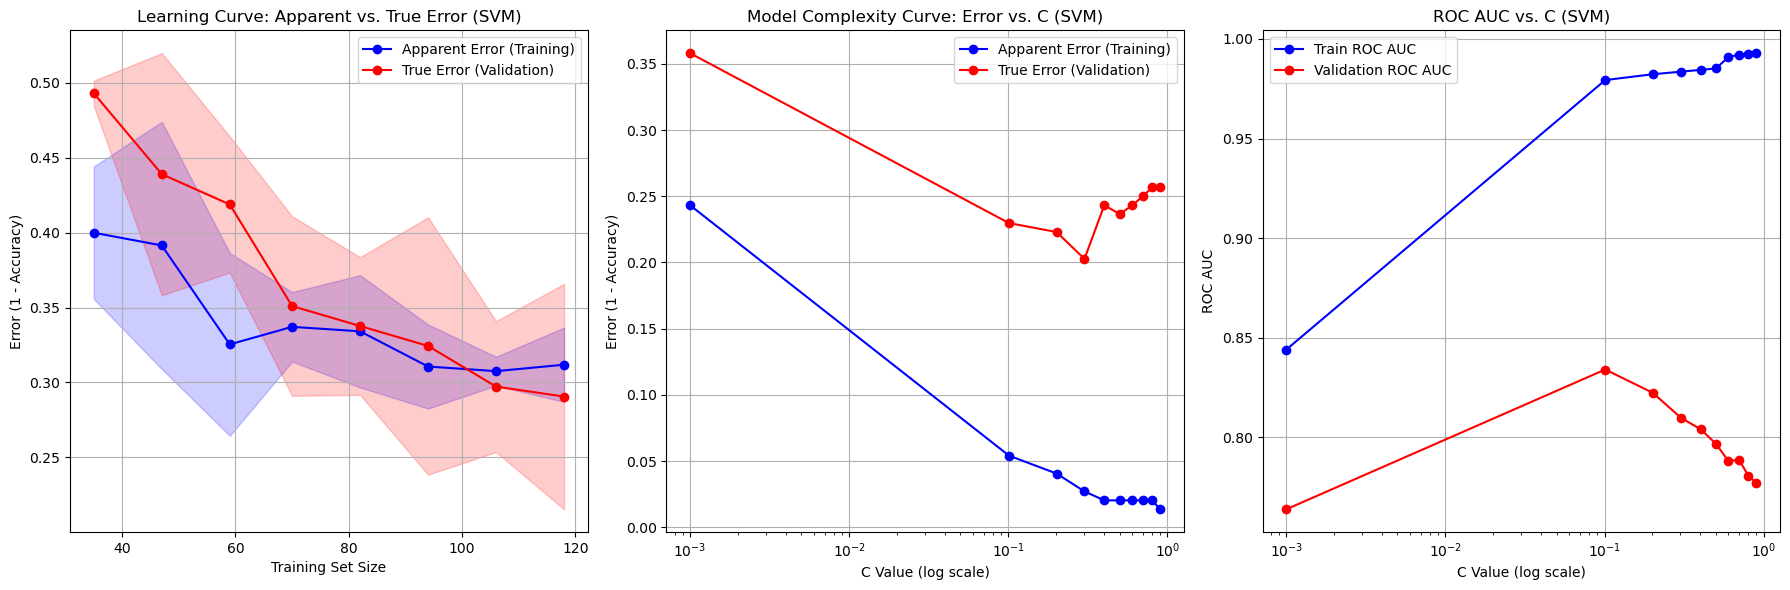

In [60]:
# --- Getting the best parameters from svm_search ---
best_params = svm_search.best_params_
best_C = best_params['classifier__C']
best_kernel = best_params['classifier__kernel']
best_gamma = best_params['classifier__gamma']

if best_kernel == 'poly':
    best_degree = best_params['classifier__degree']
    best_coef0 = best_params['classifier__coef0']
    final_model = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma,
                      degree=best_degree, coef0=best_coef0)
else:
    final_model = SVC(C=best_C, kernel=best_kernel, gamma=best_gamma)

# Building the final pipeline
final_pipeline_soft_svm = Pipeline([
    ('scaler', RobustScaler()),
    ('classifier', final_model)
])

# Create 1 figure with 3 subplots next to each other
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# === PLOT 1: Learning Curve ===
axs[0].plot(train_sizes, train_error, marker='o', label='Apparent Error (Training)', color='blue')
axs[0].plot(train_sizes, val_error, marker='o', label='True Error (Validation)', color='red')
axs[0].fill_between(train_sizes, train_error - train_std, train_error + train_std, alpha=0.2, color='blue')
axs[0].fill_between(train_sizes, val_error - val_std, val_error + val_std, alpha=0.2, color='red')
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Error (1 - Accuracy)')
axs[0].set_title('Learning Curve: Apparent vs. True Error (SVM)')
axs[0].legend()
axs[0].grid(True)

# === PLOT 2: Error vs. C ===
axs[1].plot(C_values, train_errors, marker='o', linestyle='-', color='blue', label='Apparent Error (Training)')
axs[1].plot(C_values, val_errors, marker='o', linestyle='-', color='red', label='True Error (Validation)')
axs[1].set_xscale('log')
axs[1].set_xlabel('C Value (log scale)')
axs[1].set_ylabel('Error (1 - Accuracy)')
axs[1].set_title('Model Complexity Curve: Error vs. C (SVM)')
axs[1].legend()
axs[1].grid(True)

# === PLOT 3: ROC AUC vs. C ===
axs[2].plot(C_values, train_auc_list, marker='o', linestyle='-', label='Train ROC AUC', color='blue')
axs[2].plot(C_values, cv_auc_list, marker='o', linestyle='-', label='Validation ROC AUC', color='red')
axs[2].set_xscale('log')
axs[2].set_xlabel('C Value (log scale)')
axs[2].set_ylabel('ROC AUC')
axs[2].set_title('ROC AUC vs. C (SVM)')
axs[2].legend()
axs[2].grid(True)

plt.tight_layout()
plt.show()


# 5. Random forest classifier

Best Hyperparameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
Validation Scores: [0.96666667 0.8        0.9        0.89655172 0.96551724]
Mean validation score: 0.9057471264367816


C:\Users\manon\AppData\Local\Temp\ipykernel_12316\2951745287.py:47: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  fig.tight_layout()


Selected Features: ['label', 'PREDICT_original_sf_convexity_avg_2.5D', 'PREDICT_original_sf_area_min_2.5D', 'PREDICT_original_logf_min_sigma1', 'PREDICT_original_logf_max_sigma1', 'PREDICT_original_logf_mean_sigma1', 'PREDICT_original_logf_skewness_sigma1', 'PREDICT_original_logf_kurtosis_sigma1', 'PREDICT_original_logf_range_sigma1', 'PREDICT_original_logf_quartile_range_sigma1', 'PREDICT_original_tf_LBP_std_R15_P36', 'PREDICT_original_tf_LBP_skewness_R15_P36', 'PREDICT_original_tf_Gabor_kurtosis_F0.05_A0.79', 'PREDICT_original_tf_Gabor_skewness_F0.2_A0.0', 'PREDICT_original_tf_Gabor_kurtosis_F0.2_A0.0', 'PREDICT_original_tf_Gabor_energy_F0.5_A1.57', 'PREDICT_original_vf_Frangi_full_max_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_vf_Frangi_full_mean_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_vf_Frangi_full_std_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_vf_Frangi_full_energy_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_vf_Frangi_full_quartile_range_SR(1.0, 10.0)_SS2.0', 'PREDICT_original_vf_Frangi_ed

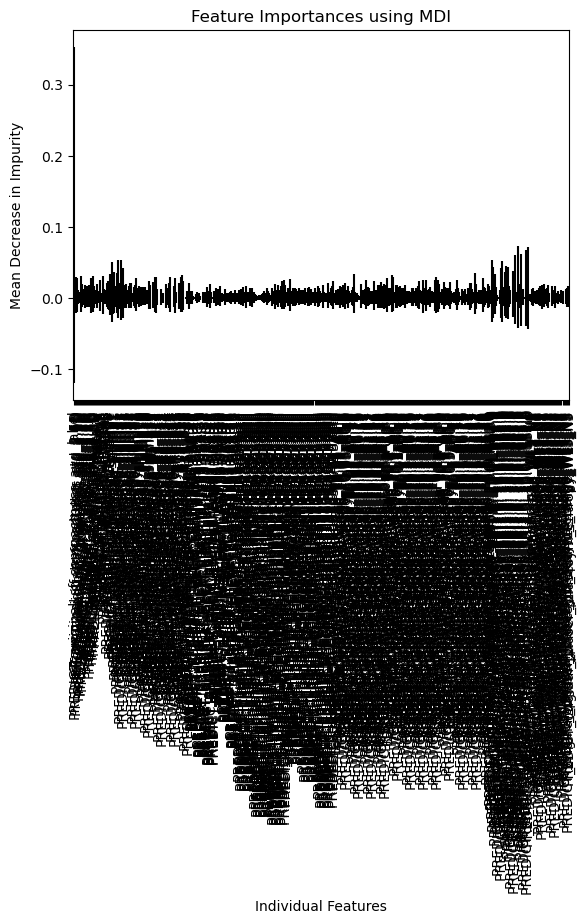

In [72]:
# Hyperparameter search
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Making random forest classifier
rf = RandomForestClassifier(random_state=42)

# Performing grid search with 5-fold cross-validation and suppress verbose output
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=0, scoring='accuracy')

# Fitting the grid search to the data (using x_train and y_train)
grid_search.fit(x_train, y_train)

# Getting the best model from grid search
best_rf = grid_search.best_estimator_

# Printing the best hyperparameters
print("Best Hyperparameters:", grid_search.best_params_)

# Evaluating the best model on the validation set using cross-validation
validation_rf = cross_val_score(estimator=best_rf, X=x_train, y=y_train, cv=5)
print(f'Validation Scores: {validation_rf}')
print(f'Mean validation score: {np.mean(validation_rf)}')

# Plotting feature importance
importances = best_rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in best_rf.estimators_], axis=0)

# Assuming x_train is a DataFrame, extract the feature names from it
feature_names = x_train.columns

# Create a Series of feature importances
forest_importances = pd.Series(importances, index=feature_names)

# Plotting the feature importances
fig, ax = plt.subplots()
forest_importances.plot.bar(ax=ax, yerr=std)
ax.set_title("Feature Importances using MDI")
ax.set_ylabel("Mean Decrease in Impurity")
ax.set_xlabel("Individual Features")
fig.tight_layout()

# Making a list with the names of the selected features (those with importance > 0.005)
selected_feature_names = [name for name, value in zip(feature_names, forest_importances) if value > 0.005]
print("Selected Features:", selected_feature_names)
print(f"Number of selected features: {len(selected_feature_names)}")

# Selecting the data of only the selected features (this step is optional if you choose not to filter features)
x_train_selected = x_train[selected_feature_names]

# Refiting the classifier on the selected features (for consistency)
best_rf.fit(x_train_selected, y_train)
validation_rf_selected = cross_val_score(estimator=best_rf, X=x_train_selected, y=y_train, cv=5)
print(f'Validation score (after feature selection): {np.mean(validation_rf_selected)}')

# 6. k-NN Classifier

c:\Users\manon\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 380, in _score
    y_pred = method_caller(
             ^^^^^^^^^^^^^^
  File "c:\Users\manon\miniconda3\Lib\site-packages\sklearn\metrics\_scorer.py", line 90,

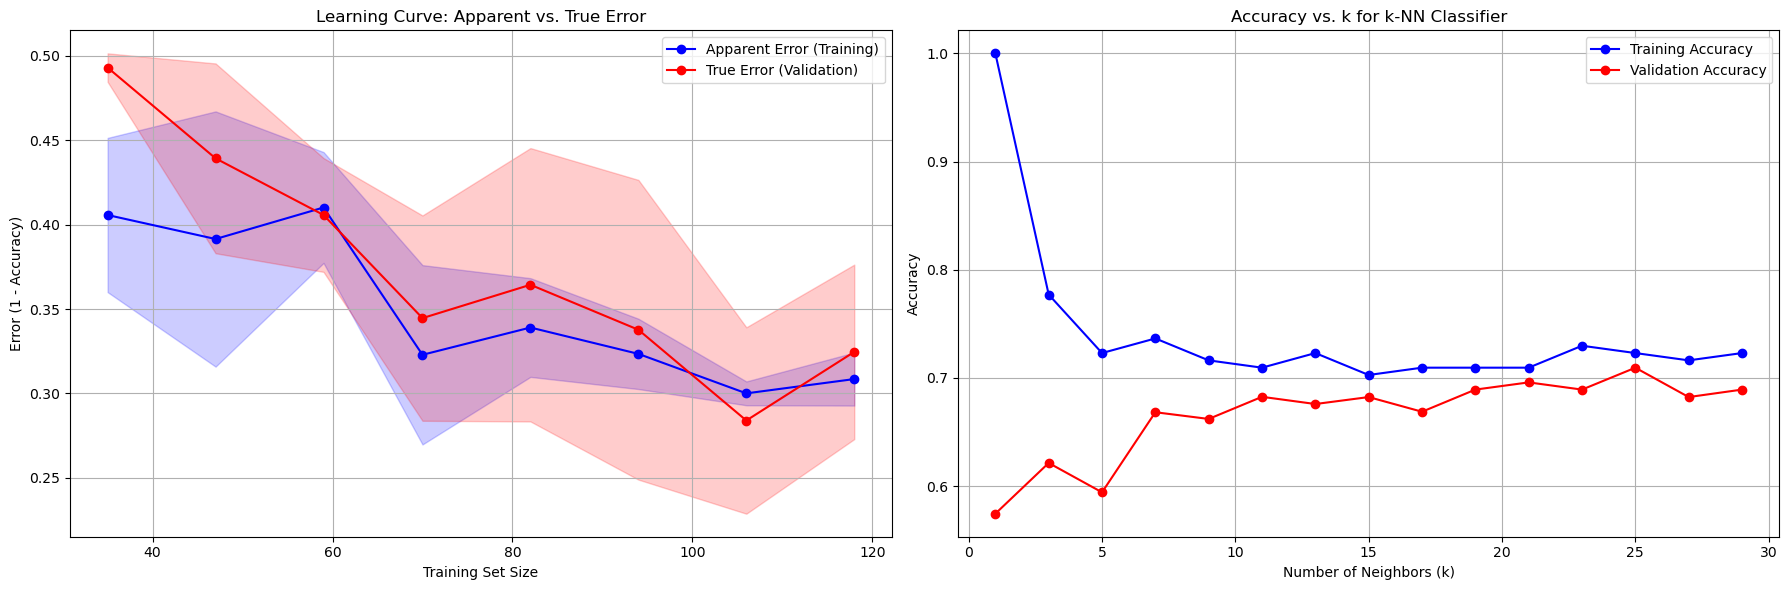

In [69]:
# Making the classifier
# Define the pipeline for kNN
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameter grid kNN
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25],
    'knn__n_neighbors': list(range(1, 31, 2)),  # Odd k values from 1 to 29
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform hyperparameter optimization with RandomizedSearchCV
random_search = RandomizedSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1, n_iter=30, random_state=42)
random_search.fit(x_train, y_train)

# PLOT 1: Learning Curve (Apparent vs. True Error)
best_k = random_search.best_params_['knn__n_neighbors']
best_pca = random_search.best_params_['pca__n_components']

# Define the final best pipeline
kn_pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('pca', PCA(n_components=best_pca)),  
    ('knn', KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='uniform'))
])

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    kn_pipeline, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Convert accuracy to error (1 - accuracy)
train_error = 1 - train_mean
val_error = 1 - val_mean

# PLOT 2: Accuracy vs. k
k_values = list(range(1, 31, 2))  # Odd k values from 1 to 29
train_accuracies_knn = []
val_accuracies_knn = []

# Loop through different k values
for k in k_values:
    # Define the pipeline with current k
    pipeline_k = Pipeline([
        ('scaler', RobustScaler()),  
        ('pca', PCA(n_components=best_pca)),  
        ('knn', KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform'))
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline_k, x_train, y_train, cv=5, scoring='accuracy')
    
    # Fit on training data to get training accuracy
    pipeline_k.fit(x_train, y_train)
    train_accuracy_knn = accuracy_score(y_train, pipeline_k.predict(x_train))

    # Store accuracies
    train_accuracies_knn.append(train_accuracy_knn)
    val_accuracies_knn.append(scores.mean())

# -------------------------------
# Create a single figure with 2 subplots side by side
# -------------------------------
fig, axs = plt.subplots(1, 2, figsize=(18, 6))

# === PLOT 1: Learning Curve (Apparent vs. True Error) ===
axs[0].plot(train_sizes, train_error, marker='o', color='blue', label='Apparent Error (Training)')
axs[0].plot(train_sizes, val_error, marker='o', color='red', label='True Error (Validation)')
axs[0].fill_between(train_sizes, train_error - train_std, train_error + train_std, color='blue', alpha=0.2)
axs[0].fill_between(train_sizes, val_error - val_std, val_error + val_std, color='red', alpha=0.2)
axs[0].set_xlabel('Training Set Size')
axs[0].set_ylabel('Error (1 - Accuracy)')
axs[0].set_title('Learning Curve: Apparent vs. True Error')
axs[0].legend()
axs[0].grid(True)

# === PLOT 2: Accuracy vs. k ===
axs[1].plot(k_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy', color='blue')
axs[1].plot(k_values, val_accuracies, marker='o', linestyle='-', label='Validation Accuracy', color='red')
axs[1].set_xlabel("Number of Neighbors (k)")
axs[1].set_ylabel("Accuracy")
axs[1].set_title("Accuracy vs. k for k-NN Classifier")
axs[1].legend()
axs[1].grid(True)

plt.tight_layout()
plt.show()

# ** 7. Naive Bayes Classifier

Total number of highly correlated feature pairs: 5993


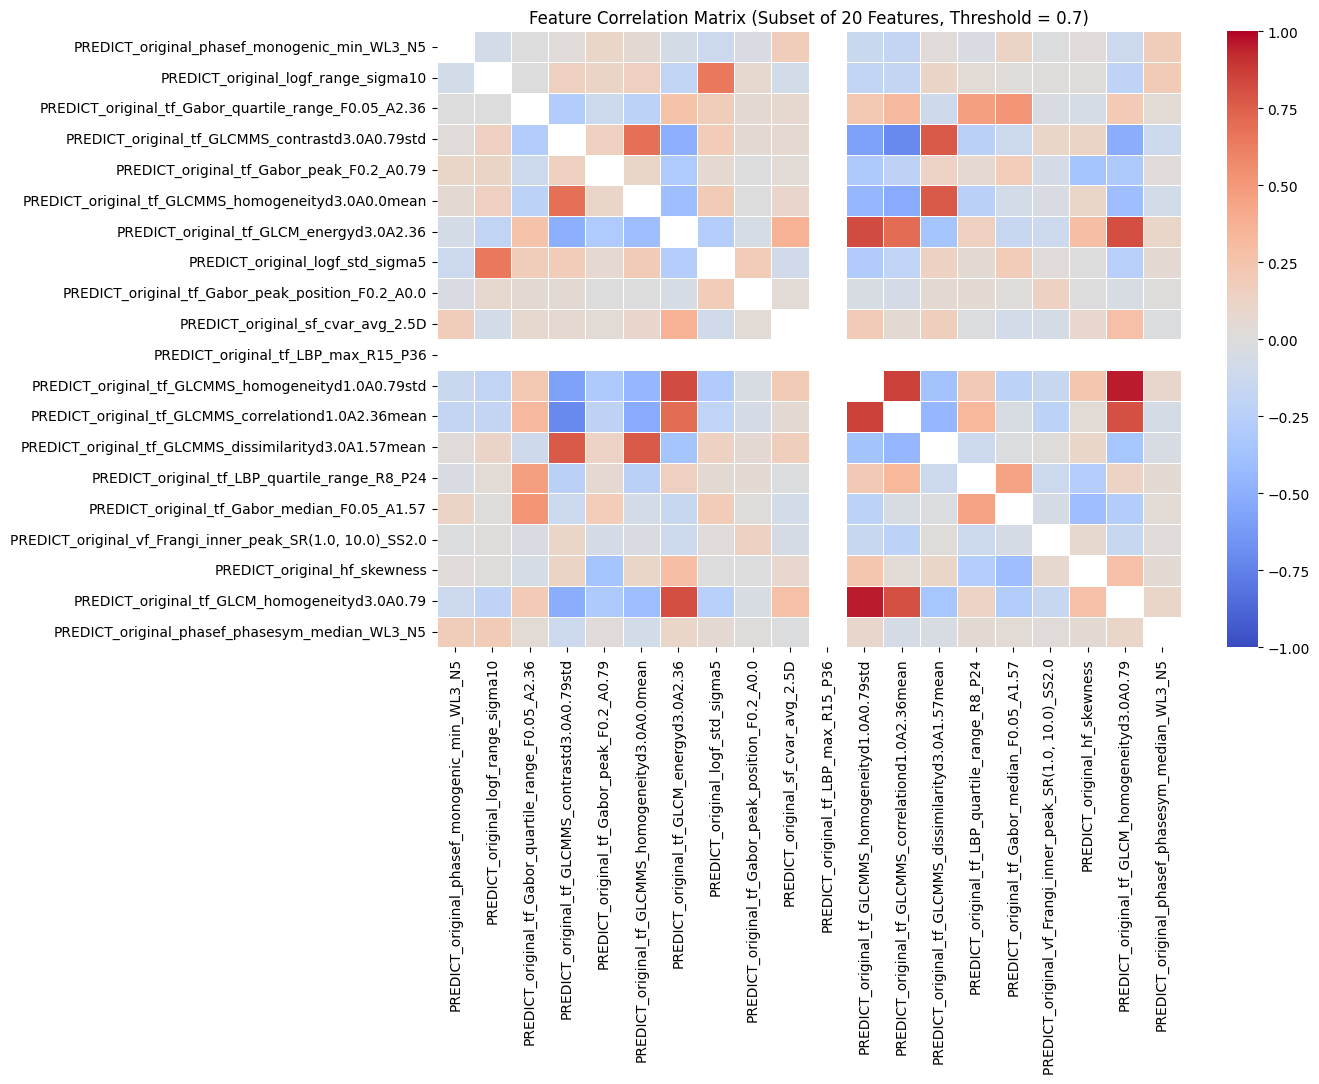

Number of features remaining: 114


In [ ]:
import seaborn as sns
from sklearn.feature_selection import mutual_info_classif

# Computing the correlation matrix of x_train
correlation_matrix = x_train.corr()

# Setting diagonal to NaN so the same features  don't show in the heatmap
np.fill_diagonal(correlation_matrix.values, np.nan)

# Setting the threshold for strong correlation
corr_threshold = 0.7
to_drop = set()

# Counting the number of highly correlated feature pairs
high_corr_pairs = (correlation_matrix.abs() > corr_threshold).sum().sum() // 2  # Each pair is counted twice
print(f"Total number of highly correlated feature pairs: {high_corr_pairs}")

# Selecting a random subset of 20 features
np.random.seed(42)
sampled_features = np.random.choice(x_train.columns, size=20, replace=False)
correlation_subset = correlation_matrix.loc[sampled_features, sampled_features]

# Plotting the correlation heatmap (subset of features)
plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_subset, 
    cmap="coolwarm", 
    annot=False, 
    linewidths=0.5, 
    vmin=-1, vmax=1  # Fix color range to show small correlations better
)
plt.title(f"Feature Correlation Matrix (Subset of 20 Features, Threshold = {corr_threshold})")
plt.show()

# Loop through each pair and drop one feature
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > corr_threshold:
            colname = correlation_matrix.columns[i]
            to_drop.add(colname)

# Drop the highly correlated features

x_train_reduced = x_train.drop(columns=to_drop)

# Check the number of features remaining
print(f"Number of features remaining: {x_train_reduced.shape[1]}")

# Results of all classifiers

In [75]:
## 1. Linear, 2. QDA and 3. Hard SVM; not analysed because classifier not used, see report

## 4. Soft SVM 
#Analyse on overfitting
print("Best CV Score (ROC):", svm_search.best_score_) #= roc score, geen accuracy
train_score_svm = svm_search.score(x_train_sig, y_train)  #accuracy score op trainingsdata 
print(f"Training score svm: {train_score_svm}")

validatie_accuracy_svm = cross_val_score(svm_search.best_estimator_, x_train_sig, y_train, scoring='accuracy', cv=4)
print("Accuracy validatie svm:", validatie_accuracy_svm )
print(f'Difference training & validation svm: {train_score_svm-np.mean(validatie_accuracy_svm)}\n')


## 5. RF
#Analyse on overfitting
print(f"Training score rf: {train_score_rf}")

print(f'validation rf {np.mean(validation_rf)}')
print(f'Validation score (after feature selection): {np.mean(validation_rf_selected)}')

print(f'Difference training & validation rf: {train_score_rf-np.mean(validation_rf)}')
print(f'Difference training & validation rf (feature selection): {train_score_rf-np.mean(validation_rf_selected)}\n')


## 6. k-NN
#Analyse on overfitting
train_score_knn = np.mean(train_accuracies_knn)
print(f"Training score knn: {train_score_knn}")
print(f'Difference training & validation knn: {train_score_knn-np.mean(val_accuracies_knn)}')
print(f'Difference training & validation knn: (feature selection): {train_score_knn-np.mean(val_accuracies_knn)}')





Best CV Score (ROC): 0.8340643274853801
Training score svm: 0.9793607305936073
Accuracy validatie svm: [0.89189189 0.72972973 0.72972973 0.72972973]
Difference training & validation svm: 0.209090460323337

Training score rf: 1.0
validation rf 0.9057471264367816
Validation score (after feature selection): 1.0
Difference training & validation rf: 0.09425287356321843
Difference training & validation rf (feature selection): 0.0

Training score knn: 0.7405405405405407
Difference training & validation knn: 0.07487004245624962
Difference training & validation knn: (feature selection): 0.07487004245624962


# Regulation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.base import clone
from sklearn.metrics import accuracy_score

def l2_regularization(model, X_train, X_val, y_train, y_val, alpha_name='alpha', plot=True):
    """
    Runs L2 regularization analysis on a model.

    Parameters:
        model (sklearn classifier): The base model to be cloned and fitted
        X_train, X_val, y_train, y_val: Data splits
        alpha_name (str): Either 'alpha' or 'C', depending on the model
        plot (bool): Whether to generate performance plots

    Returns:
        results (dict): Dictionary containing alphas, accuracies, times, coefs, best_alpha, best_accuracy
    """
    # Calculate error for multiple alphas 
    n_alphas = 200
    alphas = np.logspace(-10, -1, n_alphas)
    
    # Initialize lists to collect results
    coefs = []
    accuracies = []
    times = []

    best_alpha = None
    best_accuracy = -np.inf  # Initialize with a very low accuracy
    
    for a in alphas:
        # Clone the model pipeline (to avoid fitting the same model multiple times)
        cloned_pipeline = clone(model)

        # Set the alpha parameter for the SVC model in the pipeline
        cloned_pipeline.set_params(**{alpha_name: a})

        t0 = time.time()
        cloned_pipeline.fit(X_train, y_train)
        duration = time.time() - t0

        # Use validation data to evaluate the model
        y_pred = cloned_pipeline.predict(X_val)
        acc = accuracy_score(y_val, y_pred)

        times.append(duration)
        accuracies.append(acc)
        coefs.append(cloned_pipeline.coef_ if hasattr(cloned_pipeline, "coef_") else np.zeros(X_train.shape[1]))

        # Track the best alpha based on highest accuracy
        if acc > best_accuracy:
            best_accuracy = acc
            best_alpha = a
        

    if plot:
        # Coefficients plot
        plt.figure()
        plt.plot(alphas, np.squeeze(coefs))
        plt.xscale('log')
        plt.gca().invert_xaxis()
        plt.title('Model Coefficients vs Regularization Strength')
        plt.xlabel(alpha_name)
        plt.ylabel('Coefficient Value')
        plt.tight_layout()
        plt.show()

        # Accuracy plot
        plt.figure()
        plt.plot(alphas, accuracies, marker='o')
        plt.xscale('log')
        plt.gca().invert_xaxis()
        plt.title('Model Accuracy vs Regularization Strength')
        plt.xlabel(alpha_name)
        plt.ylabel('Accuracy')
        plt.tight_layout()
        plt.show()

        # Time plot
        plt.figure()
        plt.plot(alphas, times, marker='o')
        plt.xscale('log')
        plt.gca().invert_xaxis()
        plt.title('Training Time vs Regularization Strength')
        plt.xlabel(alpha_name)
        plt.ylabel('Time (s)')
        plt.tight_layout()
        plt.show()

    # Return the results including best_alpha and best_accuracy
    return {
        'alphas': alphas,
        'accuracies': accuracies,
        'times': times,
        'coefs': coefs,
        'best_alpha': best_alpha,
        'best_accuracy': best_accuracy
    }

X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42  # 20% for validation, 80% for training
)
    
    # Train the model on each fold
results_svm_soft = l2_regularization(
    model=final_pipeline_soft_svm,
    X_train=X_train_split,
    X_val=X_val_split,
    y_train=y_train_split,
    y_val=y_val_split,
    alpha_name='classifier__C'
    )

# Print the best alpha and accuracy for each model
print(f"Best alpha for soft SVM: {results_svm_soft['best_alpha']}")
print(f"Best Accuracy for soft SVM: {results_svm_soft['best_accuracy']}")


# Performance models

In [ ]:
# Scoring variables
from sklearn.naive_bayes import GaussianNB 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score, cross_validate

scoring = ['accuracy', 'roc_auc']

## missende pipelines doe het nu hier maar handiger in fucnties zelf
lda_pipeline = Pipeline([
    ('lda', LinearDiscriminantAnalysis())
])
qda_pipeline = Pipeline([
    ('qda', QuadraticDiscriminantAnalysis())
])
rf_pipeline = Pipeline([
    ('rf', RandomForestClassifier(n_estimators=10, criterion='gini', min_samples_split=2))
])
nb_pipeline = Pipeline([
    ('nb', GaussianNB())
])

# Cross-validation WSS AL IN CLASSIFIERS ZELF
lda_scores = cross_validate(lda_pipeline, x_train_sig, y_train, cv=5, scoring=scoring)
qda_scores = cross_validate(qda_pipeline, x_train_sig, y_train, cv=5, scoring=scoring)
svm_hard_scores = cross_validate(svm_hard_pipeline, x_train_sig, y_train, cv=5, scoring=scoring) #pl naam aangepast in code
svm_soft_scores = cross_validate(final_pipeline_soft_svm, x_train_sig, y_train, cv=5, scoring=scoring) #''
rf_scores = cross_validate(rf_pipeline, x_train_sig_selected, y_train, cv=5, scoring=scoring)
kn_scores = cross_validate(kn_pipeline, x_train_sig, y_train, cv=5, scoring=scoring) # ''
nb_scores = cross_validate(nb_pipeline, x_train_reduced, y_train, cv=5, scoring=scoring)

# Calculate mean accuracy and ROC AUC for all models
lda_avg_accuracy = np.mean(lda_scores['test_accuracy'])
lda_avg_roc_auc = np.mean(lda_scores['test_roc_auc'])

qda_avg_accuracy = np.mean(qda_scores['test_accuracy'])
qda_avg_roc_auc = np.mean(qda_scores['test_roc_auc'])

svm_hard_avg_accuracy = np.mean(svm_hard_scores['test_accuracy'])
svm_hard_avg_roc_auc = np.mean(svm_hard_scores['test_roc_auc'])

svm_soft_avg_accuracy = np.mean(svm_soft_scores['test_accuracy'])
svm_soft_avg_roc_auc = np.mean(svm_soft_scores['test_roc_auc'])

rf_avg_accuracy = np.mean(rf_scores['test_accuracy'])
rf_avg_roc_auc = np.mean(rf_scores['test_roc_auc'])

knn_avg_accuracy = np.mean(kn_scores['test_accuracy'])
knn_avg_roc_auc = np.mean(kn_scores['test_roc_auc'])

nb_avg_accuracy = np.mean(nb_scores['test_accuracy'])
nb_avg_roc_auc = np.mean(nb_scores['test_roc_auc'])

# print mean and standard deviation
# LDA
print("LDA Accuracy: {:.3f} ± {:.3f}".format(lda_avg_accuracy, np.std(lda_scores['test_accuracy'])))
print("LDA ROC AUC: {:.3f} ± {:.3f}".format(lda_avg_roc_auc, np.std(lda_scores['test_roc_auc'])))

# QDA
print("QDA Accuracy: {:.3f} ± {:.3f}".format(qda_avg_accuracy, np.std(qda_scores['test_accuracy'])))
print("QDA ROC AUC: {:.3f} ± {:.3f}".format(qda_avg_roc_auc, np.std(qda_scores['test_roc_auc'])))

# SVM (hard margin)
print("SVM (Hard Margin) Accuracy: {:.3f} ± {:.3f}".format(svm_hard_avg_accuracy, np.std(svm_hard_scores['test_accuracy'])))
print("SVM (Hard Margin) ROC AUC: {:.3f} ± {:.3f}".format(svm_hard_avg_roc_auc, np.std(svm_hard_scores['test_roc_auc'])))

# SVM (soft margin)
print("SVM (Soft Margin) Accuracy: {:.3f} ± {:.3f}".format(svm_soft_avg_accuracy, np.std(svm_soft_scores['test_accuracy'])))
print("SVM (Soft Margin) ROC AUC: {:.3f} ± {:.3f}".format(svm_soft_avg_roc_auc, np.std(svm_soft_scores['test_roc_auc'])))

# Random Forest
print("Random Forest Accuracy: {:.3f} ± {:.3f}".format(rf_avg_accuracy, np.std(rf_scores['test_accuracy'])))
print("Random Forest ROC AUC: {:.3f} ± {:.3f}".format(rf_avg_roc_auc, np.std(rf_scores['test_roc_auc'])))

# KNN
print("KNN Accuracy: {:.3f} ± {:.3f}".format(knn_avg_accuracy, np.std(kn_scores['test_accuracy'])))
print("KNN ROC AUC: {:.3f} ± {:.3f}".format(knn_avg_roc_auc, np.std(kn_scores['test_roc_auc'])))

# Naive Bayes
print("Naive Bayes Accuracy: {:.3f} ± {:.3f}".format(nb_avg_accuracy, np.std(nb_scores['test_accuracy'])))
print("Naive Bayes ROC AUC: {:.3f} ± {:.3f}".format(nb_avg_roc_auc, np.std(nb_scores['test_roc_auc'])))

# Create dictionary of models and their mean scores
models = {
    'LDA': {'accuracy': lda_avg_accuracy, 'roc_auc': lda_avg_roc_auc},
    'QDA': {'accuracy': qda_avg_accuracy, 'roc_auc': qda_avg_roc_auc},
    'SVM (Hard)': {'accuracy': svm_hard_avg_accuracy, 'roc_auc': svm_hard_avg_roc_auc},
    'SVM (Soft)': {'accuracy': svm_soft_avg_accuracy, 'roc_auc': svm_soft_avg_roc_auc},
    'Random Forest': {'accuracy': rf_avg_accuracy, 'roc_auc': rf_avg_roc_auc},
    'KNN': {'accuracy': knn_avg_accuracy, 'roc_auc': knn_avg_roc_auc},
    'Naive Bayes': {'accuracy': nb_avg_accuracy, 'roc_auc': nb_avg_roc_auc}
}

# Search for models with highest accuracy and ROC AUC
best_accuracy_model = max(models, key=lambda x: models[x]['accuracy'])
best_roc_auc_model = max(models, key=lambda x: models[x]['roc_auc'])

# Print best models
print(f"Best model by Accuracy: {best_accuracy_model} ({models[best_accuracy_model]['accuracy']:.3f})")
print(f"Best model by ROC AUC: {best_roc_auc_model} ({models[best_roc_auc_model]['roc_auc']:.3f})")




# Final for-loop

In [ ]:
def split_test_data(x, y, random_state, test_size=0.2):
    """
    Splits the data (features x and labels y) into training and testing sets.
    
    Parameters:
    x :             The input feature set (DataFrame).
    y :             The target labels (DataFrame)
    random_state :  The seed used by the random number generator for reproducibility (int).
    test_size :     The proportion of the data to be used as the test set (float, optional (default=0.2)).

    Returns:
    x_train, x_test, y_train, y_test : The training and test splits for both features and labels (arrays).
    """
    # Splitting data into train and test sets based on the specified random state
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y, random_state=random_state)
    
    # Printing the shape of the datasets
    print(f"The shapes of the datasets for random_state={random_state} are:")
    print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
    
    return x_train, x_test, y_train, y_test


## final for loop

y = num_data['label']
x = num_data.drop(columns=['label'])

for i in range(1,6):
    split_test_data(x, y, i, 0.2)


## voorbeeld met kn classifier 

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def split_test_data(x, y, random_state, test_size=0.2):
    """
    Splits the data (features x and labels y) into training and testing sets.
    """
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, stratify=y, random_state=random_state)
    print(f"The shapes of the datasets for random_state={random_state} are:")
    print(f"x_train: {x_train.shape}, x_test: {x_test.shape}")
    return x_train, x_test, y_train, y_test

# Assuming num_data is your dataframe with 'label' column
y = num_data['label']
x = num_data.drop(columns=['label'])

# KNN parameters
k = 5  # Example for the number of neighbors
knn = KNeighborsClassifier(n_neighbors=k)

# Loop through splits and train/evaluate KNN
for i in range(1, 6):
    # Split the data
    x_train, x_test, y_train, y_test = split_test_data(x, y, i, 0.2)
    
    # Fit KNN model
    knn.fit(x_train, y_train)
    
    # Predict and calculate accuracy
    y_pred = knn.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Print the accuracy for this random_state
    print(f"Accuracy for random_state={i}: {accuracy:.4f}\n")

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k=153)
X_train_sig = selector.fit_transform(x_train, y_train)
X_test_sig = selector.transform(x_test)  # Apply the same transformation to the test data

models = {
    'Logistic Regression': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', LogisticRegression(solver='liblinear', random_state=42))
        ]),
        'param_grid': {
            'clf__penalty': ['l1', 'l2'],
            'clf__C': [0.001, 0.01, 0.1, 1.0]
        },
        'use_sig': False
    },
    'Decision Tree': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', DecisionTreeClassifier(random_state=42))
        ]),
        'param_grid': {
            'clf__criterion': ['gini', 'entropy'],
            'clf__max_depth': [2, 4, 6, 8, 10],
            'clf__min_samples_leaf': [1, 2, 4],
            'clf__min_samples_split': [2, 5]
        },
        'use_sig': False
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        'param_grid': {
            'clf__n_estimators': [30, 50],
            'clf__max_depth': [4, 6, 8],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        },
        'use_sig': False
    },
    'k-Nearest Neighbors': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('pca', PCA()),
            ('clf', KNeighborsClassifier())
        ]),
        'param_grid': {
            'pca__n_components': [5, 10, 15],
            'clf__n_neighbors': list(range(1, 20, 2)),
            'clf__weights': ['uniform', 'distance'],
            'clf__metric': ['euclidean', 'manhattan']
        },
        'use_sig': True
    },
    'Naive Bayes': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', GaussianNB())
        ]),
        'param_grid': {},
        'use_sig': False
    },
    'Linear Discriminant Analysis': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', LDA())
        ]),
        'param_grid': {},
        'use_sig': True
    },
    'Quadratic Discriminant Analysis': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', QDA())
        ]),
        'param_grid': {},
        'use_sig': True
    },
    'SVM': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', SVC(probability=True, random_state=42))
        ]),
        'param_grid': {
            'clf__C': [0.001, 0.01, 0.1, 1.0],
            'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'clf__gamma': ['scale', 'auto'],
            'clf__degree': [2, 3, 4],
            'clf__coef0': np.linspace(0, 1, 3).tolist()
        },
        'use_sig': False
    }
}

results = {}

for name, config in models.items():
    print(f'\nTraining {name}...')

    # Apply feature selection on both training and test data
    X_train_use = X_train_sig if config['use_sig'] else x_train
    X_test_use = X_test_sig if config['use_sig'] else x_test

    if config['param_grid']:
        search = GridSearchCV(
            config['pipeline'],
            param_grid=config['param_grid'],
            scoring='roc_auc',
            cv=5,
            n_jobs=-1
        )
        search.fit(X_train_use, y_train)
        model = search.best_estimator_
    else:
        model = config['pipeline']
        model.fit(X_train_use, y_train)

    if hasattr(model.named_steps['clf'], 'predict_proba'):
        y_scores = model.predict_proba(X_test_use)[:, 1]
    elif hasattr(model.named_steps['clf'], 'decision_function'):
        y_scores = model.decision_function(X_test_use)
    else:
        raise ValueError(f"The model {name} does not support 'predict_proba' or 'decision_function'.")

    auc = roc_auc_score(y_test, y_scores)
    acc = accuracy_score(y_test, model.predict(X_test_use))

    results[name] = {'auc': auc, 'acc': acc}

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC={auc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\nSummary:")
for model, metrics in results.items():
    print(f"{model}: Accuracy = {metrics['acc']:.3f}, ROC AUC = {metrics['auc']:.3f}")


IndentationError: unexpected indent (2830744294.py, line 22)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
from sklearn.feature_selection import SelectKBest, f_classif

# Feature selection
selector = SelectKBest(f_classif, k=153)
X_train_sig = selector.fit_transform(x_train, y_train)
X_test_sig = selector.transform(x_test)  # Apply the same transformation to the test data

models = {
    'Logistic Regression': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', LogisticRegression(solver='liblinear', random_state=42))
        ]),
        'param_grid': {
            'clf__penalty': ['l1', 'l2'],
            'clf__C': [0.001, 0.01, 0.1, 1.0]
        },
        'use_sig': False  # Use significant features for this model
    },
    'Decision Tree': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', DecisionTreeClassifier(random_state=42))
        ]),
        'param_grid': {
            'clf__criterion': ['gini', 'entropy'],
            'clf__max_depth': [2, 4, 6, 8, 10],
            'clf__min_samples_leaf': [1, 2, 4],
            'clf__min_samples_split': [2, 5]
        },
        'use_sig': False
    },
    'Random Forest': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', RandomForestClassifier(random_state=42))
        ]),
        'param_grid': {
            'clf__n_estimators': [30, 50],
            'clf__max_depth': [4, 6, 8],
            'clf__min_samples_split': [2, 5],
            'clf__min_samples_leaf': [1, 2]
        },
        'use_sig': False
    },
    'k-Nearest Neighbors': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('pca', PCA()),
            ('clf', KNeighborsClassifier())
        ]),
        'param_grid': {
            'pca__n_components': [5, 10, 15],
            'clf__n_neighbors': list(range(1, 20, 2)),
            'clf__weights': ['uniform', 'distance'],
            'clf__metric': ['euclidean', 'manhattan']
        },
        'use_sig': True
    },
    'Naive Bayes': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', GaussianNB())
        ]),
        'param_grid': {},
        'use_sig': False
    },
    'Linear Discriminant Analysis': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', LDA())
        ]),
        'param_grid': {},
        'use_sig': True
    },
    'Quadratic Discriminant Analysis': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', QDA())
        ]),
        'param_grid': {},
        'use_sig': True
    },
    'SVM': {
        'pipeline': Pipeline([
            ('scaler', RobustScaler()),
            ('clf', SVC(probability=True, random_state=42))
        ]),
        'param_grid': {
            'clf__C': [0.001, 0.01, 0.1, 1.0],
            'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
            'clf__gamma': ['scale', 'auto'],
            'clf__degree': [2, 3, 4],
            'clf__coef0': np.linspace(0, 1, 3).tolist()
        },
        'use_sig': False
    }
}

results = {}

for name, config in models.items():
    print(f'\nTraining {name}...')

    # Apply feature selection on both training and test data
    X_train_use = X_train_sig if config['use_sig'] else x_train
    X_test_use = X_test_sig if config['use_sig'] else x_test

    if config['param_grid']:
        search = GridSearchCV(
            config['pipeline'],
            param_grid=config['param_grid'],
            scoring='accuracy',  # Changed from 'roc_auc' to 'accuracy'
            cv=5,
            n_jobs=-1
        )
        search.fit(X_train_use, y_train)
        model = search.best_estimator_
    else:
        model = config['pipeline']
        model.fit(X_train_use, y_train)

    # Evaluate accuracy for the test set
    acc = accuracy_score(y_test, model.predict(X_test_use))

    results[name] = {'acc': acc}

    # Plot ROC curve
    if hasattr(model.named_steps['clf'], 'predict_proba'):
        y_scores = model.predict_proba(X_test_use)[:, 1]
    elif hasattr(model.named_steps['clf'], 'decision_function'):
        y_scores = model.decision_function(X_test_use)
    else:
        raise ValueError(f"The model {name} does not support 'predict_proba' or 'decision_function'.")

    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (Acc={acc:.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.title('ROC Curves for All Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

print("\nSummary:")
for model, metrics in results.items():
    print(f"{model}: Accuracy = {metrics['acc']:.3f}")



Training Logistic Regression...


/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [  0  77  78  85  86  91  97  98 104 111 468 475 476 481 488 489] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: divide by zero encountered in divide
  f = msb / msw
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw



Training Decision Tree...

Training Random Forest...

Training k-Nearest Neighbors...

Training Naive Bayes...

Training Linear Discriminant Analysis...

Training Quadratic Discriminant Analysis...

Training SVM...


/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 0 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/discriminant_analysis.py:1024: LinAlgWarning: The covariance matrix of class 1 is not full rank. Increasing the value of parameter `reg_param` might help reducing the collinearity.
  warnings.warn(
